# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data)
    
    1.1 [Initial Exploration](#1.1-Initial-Exploration) <br><br>
    
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)

    2.1 [Missing Values](#2.1-Missing-Values)
    
    2.2 [Duplicates](#2.2-Duplicates)
    
    2.3 [Incoherencies](#2.3-Incoherencies)
    
    2.4 [Outliers](#2.4-Outliers)
    
    2.5 [Feature Engineering](#2.5-Feature-Engineering)
    
    2.6 [Visualisations](#2.6-Visualisations) <br><br>
    
3. [Export](#3.-Export)


# 1. Importing Libraries & Data

In [19]:
#Data processing libraries
import pandas as pd
import numpy as np 

# For missing values detection
import missingno as msno

# Show all columns of the dataset
pd.set_option('display.max_columns', None)

# import external py file
import functions as f

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [20]:
data = pd.read_csv('data/DM2425_ABCDEats_DATASET.csv', index_col = "customer_id")
data

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 1.1 Initial Exploration

In [21]:
'''profile = ProfileReport(
    data, 
    title='Data',
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },
)

profile'''

'profile = ProfileReport(\n    data, \n    title=\'Data\',\n    correlations={\n        "pearson": {"calculate": True},\n        "spearman": {"calculate": False},\n        "kendall": {"calculate": False},\n        "phi_k": {"calculate": False},\n        "cramers": {"calculate": False},\n    },\n)\n\nprofile'

# 2. Exploratory Data Analysis

<a href="#top">Top &#129033;</a>


In [22]:
pd.set_option('display.max_rows', None)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,31161.0,27.506499,7.160898,15.0,23.0,26.0,31.00,80.00
vendor_count,31888.0,3.102609,2.771587,0.0,1.0,2.0,4.00,41.00
product_count,31888.0,5.668245,6.957287,0.0,2.0,3.0,7.00,269.00
is_chain,31888.0,2.818866,3.977529,0.0,1.0,2.0,3.00,83.00
first_order,31782.0,28.478604,24.109086,0.0,7.0,22.0,45.00,90.00
last_order,31888.0,63.675521,23.226123,0.0,49.0,70.0,83.00,90.00
CUI_American,31888.0,4.880438,11.654018,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31888.0,9.960451,23.564351,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31888.0,2.300633,8.479734,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31888.0,0.801163,6.427132,0.0,0.0,0.0,0.00,326.10


In [23]:
pd.reset_option('display.max_rows', None)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

## 2.1 Missing Values

<a href="#top">Top &#129033;</a>


In [25]:
data[data['customer_age'].isna()]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.00,0.00,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
8e8652bdc8,4660,NaN,2,3,2,0.0,6,DISCOUNT,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,34.88,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
6137fa5620,8670,NaN,2,2,2,0.0,8,DISCOUNT,CARD,6.13,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,13.15,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2a90e9da84,4660,NaN,2,2,1,0.0,17,-,CARD,15.99,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,1.54,0.0,0.0,0.00,0.00,0.0,0,0,1,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
a67d3108cb,8670,NaN,2,2,1,0.0,17,-,CARD,0.00,25.85,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0,0,1,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46aa9dfeb0,8670,NaN,1,2,0,87.0,87,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,25.05,0.0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
29207a92c8,2360,NaN,1,1,1,88.0,88,-,CASH,0.00,0.00,3.88,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,1,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
d7bf721199,2360,NaN,1,1,1,89.0,89,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,3.74,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [26]:
data.isna().sum()

customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5                          0
DOW_6     

We can visualize and analyse missing values by using the library ``missingno``. This library provides different visualizations, such as heatmaps and dendograms, that help us in identifying and understanding patterns of missingness in data. 

##### Missingno Bar Chart

Below we have plotted the count of values per column, organized in descending order. This means that columns with the lowest values are positioned at the beginning, followed by those with higher counts.

<Axes: >

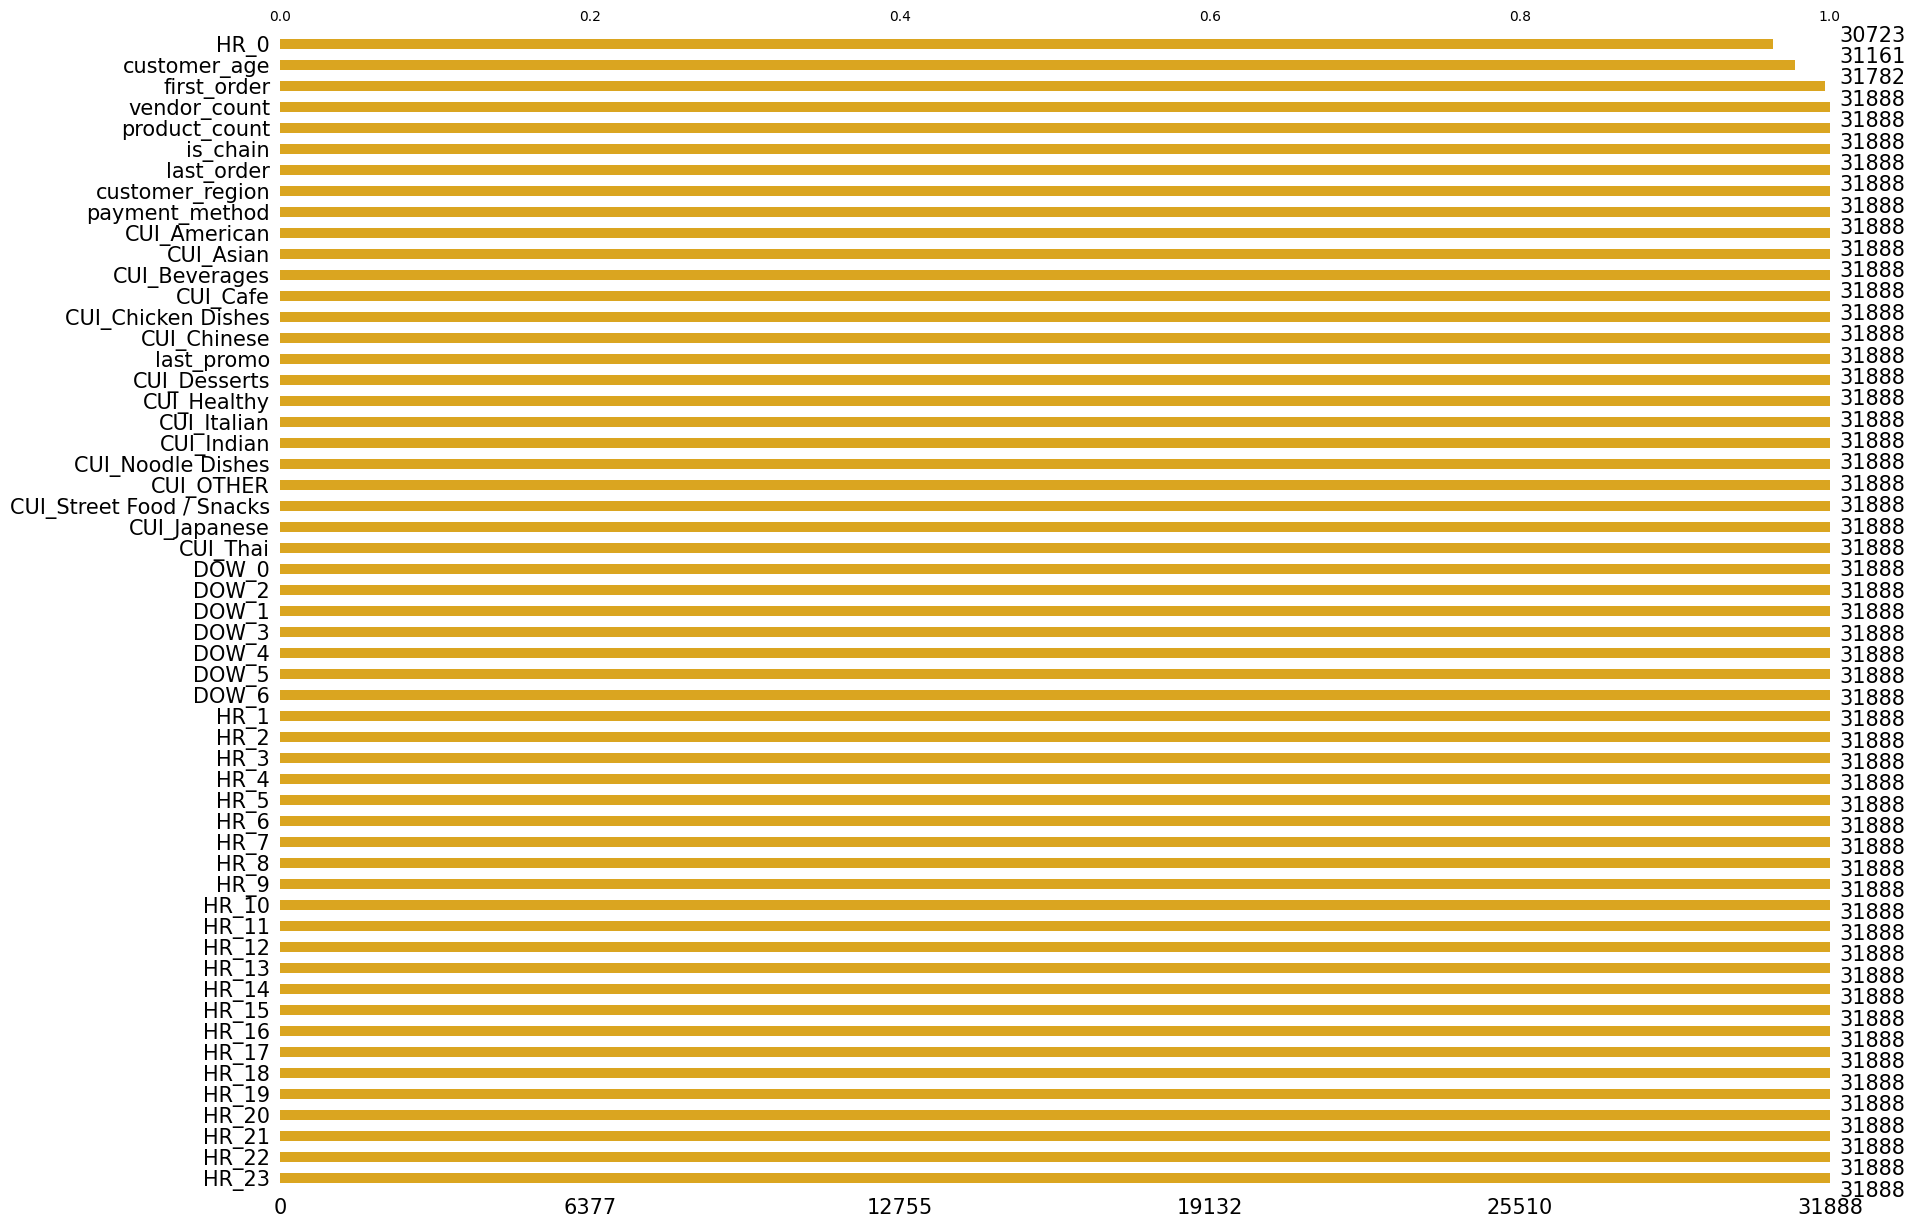

In [27]:
# Bar Chart
msno.bar(data, figsize=(20,15), fontsize=15, color='goldenrod', sort="descending")

As it can be seen and as mentioned previously, we can see that the columns ``HR_0``, ``customer_age`` and ``first_order`` exhibit missing values. These three variables have a relatively low percentage of missing data, with less than 5% of their values missing.

##### Heatmap visualization
We can also use the ``missingno`` library to explore the relationships between missing values across column pairs. By analyzing the nullity correlation, we can identify columns whose missing data are either directly or inversely related. In this analysis, only columns with missing values are considered.

A nullity correlation value close to 1 indicates a strong positive relationship, meaning that if one column has a missing value, the other is likely to have one as well. On the other hand, a correlation value near -1 suggests a strong inverse relationship, where one column is missing values while the other is not. Values around zero indicate no significant correlation between the missing data in the two columns.

<Axes: >

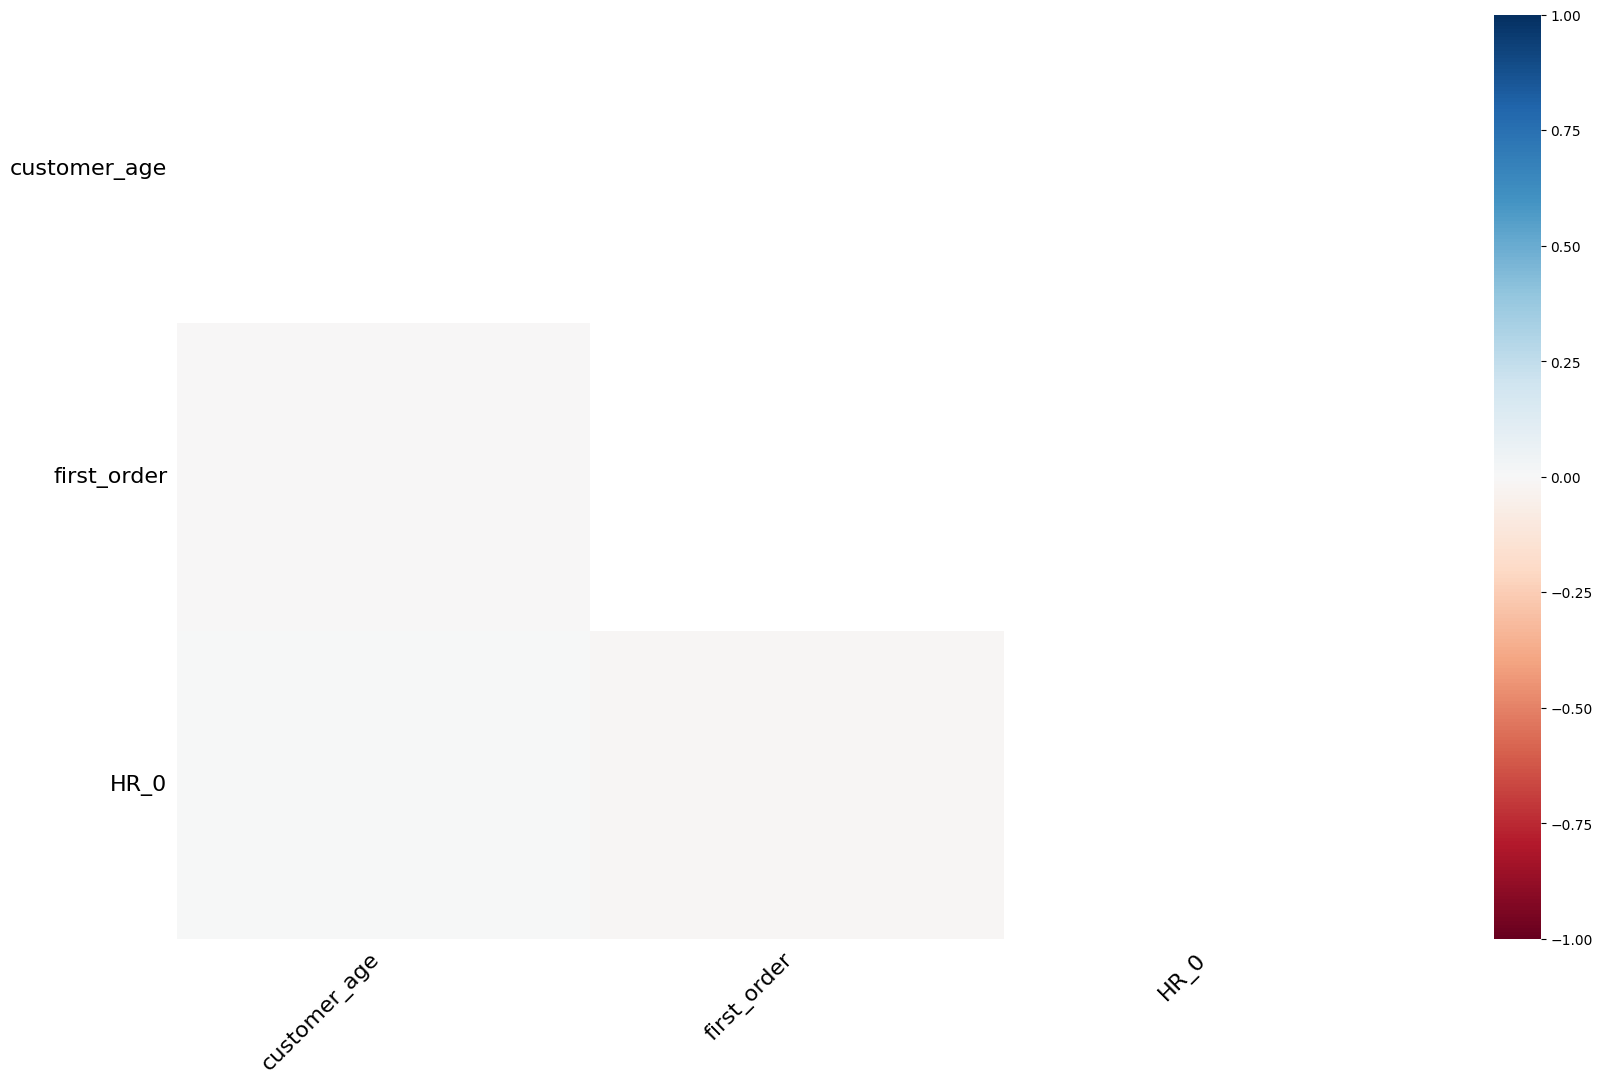

In [28]:
msno.heatmap(data)

From the visualization, it is clear that there is no direct correlation between any pair of the variables with missing values. The absence of displayed correlation values suggests that the correlation either is rounded to 0 (between -0.05 and 0.05) or is exactly 0. This indicates that the missing values in one column have no significant relationship with those in another, meaning the occurrence of missing data is likely independent across these variables - Missing Completely at Random (MCAR).

<br>

### Handling the missing values

customer_age missing values:

In [29]:
# Identify the favorite cuisine of each customer
cuisine_columns = [col for col in data.columns if col.startswith('CUI_')]

# Create a new column with the favorite cuisine of each customer
data['favorite_cuisine'] = data[cuisine_columns].idxmax(axis=1)

# Create a new column with the region and favorite cuisine of each customer
data['region_cuisine_group'] = data['customer_region'] + "_" + data['favorite_cuisine']

# Calculate the average age of customers in each region and cuisine group
age_medians = data.groupby('region_cuisine_group')['customer_age'].median()

In [30]:
# Create a function to impute missing values of age
def impute_age(row):
    if np.isnan(row['customer_age']):
        return int(round(age_medians.get(row['region_cuisine_group'], np.nan)))
    else:
        return row['customer_age']

# Apply the function to impute missing values of age
data['customer_age'] = data.apply(impute_age, axis=1)

# Check if there are still missing values of age
missing_ages = data['customer_age'].isna().sum()
print(f"There are still {missing_ages} age values to impute.")

There are still 0 age values to impute.


Proving the imputation method:

In [32]:
# List with the customer_ids with previous missing values of age
customer_ids_with_missing = ['180c632ed8', '8e8652bdc8', '6137fa5620', '2a90e9da84', 
                             'a67d3108cb', '46aa9dfeb0', '29207a92c8', 'd7bf721199', 
                             'ee49f4eb0a', 'f6b6709018']

# Check the values of the customers with previous missing values of age
data.loc[data['customer_id'].isin(customer_ids_with_missing), ['customer_id', 'customer_age', 'favorite_cuisine', 'region_cuisine_group']]


KeyError: 'customer_id'

In [34]:
# Check the values of the customers with previous missing values of age
for customer_id in customer_ids_with_missing:
    group = data.loc[data['customer_id'] == customer_id, 'region_cuisine_group'].values[0]
    mean_age = age_medians.get(group, np.nan)
    imputed_age = data.loc[data['customer_id'] == customer_id, 'customer_age'].values[0]
    
    print(f"Customer ID: {customer_id}")
    print(f"Group (Region + Cuisine): {group}")
    print(f"Group's median: {round(mean_age)}")
    print(f"Imputed age: {imputed_age}\n")


KeyError: 'customer_id'

first_order missing values:

HR_0 missing values:

## 2.2 Duplicates

<a href="#top">Top &#129033;</a>


## 2.3 Incoherencies

<a href="#top">Top &#129033;</a>


*Check the customer's ages*

In [35]:
data['customer_age'].min() # What is the minimum legal age to order deliveries?

np.float64(15.0)

In [36]:
data[data['customer_age'] == 15]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,favorite_cuisine,region_cuisine_group
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
e79f867434,8670,15.0,2,3,1,0.0,5,DELIVERY,DIGI,6.06,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,23.92,0.00,0.00,0.00,0.00,0,0,0,0,1,0,1,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Japanese,8670_CUI_Japanese
95457a237c,2440,15.0,4,5,4,0.0,69,-,CASH,4.64,0.00,2.21,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,3.77,6.32,0.00,0,1,1,0,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0,0,0,0,0,CUI_Street Food / Snacks,2440_CUI_Street Food / Snacks
a763ccaa87,4660,15.0,10,17,11,1.0,67,-,CARD,13.68,28.62,0.00,0.0,0.00,0.00,0.0,4.85,8.15,11.58,15.62,0.00,0.00,0.00,0.00,2,6,2,1,5,0,0,0.0,0,0,0,0,0,0,4,0,2,2,1,2,2,2,0,0,1,0,0,0,0,0,0,CUI_Asian,4660_CUI_Asian
29e9751b2b,2360,15.0,11,21,17,2.0,76,-,CARD,0.00,4.48,0.00,0.0,8.80,9.72,0.0,0.00,0.00,0.00,0.00,25.84,14.94,0.00,1.42,7,2,1,1,2,2,2,0.0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,1,10,1,0,0,0,0,CUI_Noodle Dishes,2360_CUI_Noodle Dishes
89caac873e,2360,15.0,2,6,2,3.0,82,-,CARD,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,25.88,0.00,0.00,0,0,1,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,CUI_OTHER,2360_CUI_OTHER
eeade5ca4b,2360,15.0,4,6,4,4.0,22,DELIVERY,CASH,0.00,7.37,0.00,0.0,14.16,0.00,0.0,0.00,3.67,0.00,0.00,0.00,0.00,0.00,0.00,2,0,0,2,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,CUI_Chicken Dishes,2360_CUI_Chicken Dishes
22e7462446,2360,15.0,1,3,3,11.0,44,DISCOUNT,CARD,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,4.69,0.00,0.00,0.00,0.00,1,1,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,CUI_Japanese,2360_CUI_Japanese
8bf5bf209f,2360,15.0,9,12,12,13.0,87,DISCOUNT,CARD,0.00,1.28,9.66,0.0,0.00,4.63,0.0,0.00,0.00,0.00,0.00,7.57,2.78,0.00,0.54,0,3,1,1,3,2,2,NaN,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,4,0,2,0,0,CUI_Beverages,2360_CUI_Beverages
f43ee5861f,8670,15.0,7,14,6,24.0,85,-,CARD,0.00,12.59,6.28,0.0,0.00,0.00,0.0,100.88,0.00,0.00,0.00,0.00,0.00,20.04,0.00,3,3,2,2,1,0,0,0.0,0,0,1,4,2,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Healthy,8670_CUI_Healthy


Above, we checked the minimum age in our dataset. There are several young customers with only 15 years old. Depending on the country, a minimum legal age to order deliveries may exist. As such, this variable should not be forgotten.

In [37]:
data['customer_age'].max()

np.float64(80.0)

Additionally, we also checked the oldest customer to verify that there were no mistakes and we had a customer that broke the world record.

*Check the number of unique vendors*

In [38]:
data['vendor_count'].min()

np.int64(0)

In [39]:
data[data['vendor_count'] == 0] # They didnt buy from any store in the last 3 months?

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,favorite_cuisine,region_cuisine_group
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
1b7c34738e,8670,24.0,0,0,0,3.0,3,-,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177ede2420,8670,30.0,0,0,1,86.0,86,-,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American


Following, we checked the number of unique vendors that our customers order from. We found some customers that did not order from any vendor and, cehcking the dataframe above, we can also see they did not buy anything. This may be because our customers did not order anything in the last 3 months which our data refers to.

*Check the total number of oredered products*

In [40]:
data['product_count'].min()

np.int64(0)

In [41]:
data[data['product_count'] == 0]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,favorite_cuisine,region_cuisine_group
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
1b7c34738e,8670,24.0,0,0,0,3.0,3,-,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
28ed1f1e3f,8670,20.0,0,0,0,89.0,89,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American


Above, we found some customers that did not order anything in the last 3 months. The dataframe above, bought to our attention that some customers did not order anything but they have a unique vendor.

*Check the customers that did not buy anything but order from vendors*

In [62]:
data[(data['product_count'] == 0) & (data['vendor_count'] != 0)]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,favorite_cuisine,region_cuisine_group
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aed85972bb,4660,27.0,1,0,0,6.0,6,DISCOUNT,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.56,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,CUI_Italian,4660_CUI_Italian
b2ebe2e6e0,4660,43.0,1,0,0,6.0,6,-,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.74,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,CUI_Italian,4660_CUI_Italian
6f723d9894,4660,36.0,1,0,0,13.0,13,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.77,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,CUI_Italian,4660_CUI_Italian
9d74f2ac81,4660,27.0,1,0,0,19.0,19,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,19.03,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CUI_Indian,4660_CUI_Indian
27b7eed8fa,4660,35.0,1,0,0,20.0,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.94,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CUI_Italian,4660_CUI_Italian
6c9e68b2e7,4660,22.0,1,0,0,20.0,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,22.24,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,CUI_OTHER,4660_CUI_OTHER
c0b330c4df,4660,27.0,1,0,0,23.0,23,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,14.42,0.0,0.0,0.00,0.0,0.0,0,1,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,CUI_Italian,4660_CUI_Italian
68c4faeecb,4660,25.0,1,0,0,26.0,26,FREEBIE,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,12.75,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,CUI_Italian,4660_CUI_Italian
48e8abd5bf,4660,34.0,1,0,0,33.0,33,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,6.52,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Indian,4660_CUI_Indian


18 of our customers did not order anything but they have a vendor they ordered from in the last 3 months

*Check is_chain*

# Consideramos binária? Demasiados valores são diferentes de 0 ou 1. Consideramos que seja o número de chains a que o customer foi?

*Check the category of promotion or discount*

In [42]:
data['last_promo'].unique() 

array(['DELIVERY', 'DISCOUNT', '-', 'FREEBIE'], dtype=object)

Detected unkown category: '-'

Is it because there was no promotion or discount? Is it the same as 'DELIVERY'

In [43]:
data[data['last_promo'] == '-']

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,favorite_cuisine,region_cuisine_group
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Asian,4660_CUI_Asian
8475ee66ef,2440,24.0,2,2,2,0.0,2,-,CARD,5.88,0.00,1.53,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,CUI_American,2440_CUI_American
dce8e4700a,8670,26.0,2,2,0,0.0,4,-,DIGI,0.00,23.62,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,1,0,0,1,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Asian,8670_CUI_Asian
f3070b7bbf,2360,21.0,2,2,2,0.0,4,-,CASH,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,9.9,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,1,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Indian,2360_CUI_Indian
7d9a62afd6,2440,27.0,2,3,2,0.0,5,-,DIGI,0.00,0.00,2.33,0.0,6.21,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,CUI_Chicken Dishes,2440_CUI_Chicken Dishes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e11a26e7ba,8670,28.0,1,1,0,NaN,0,-,CARD,0.00,6.13,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Asian,8670_CUI_Asian
e879afcc21,8670,41.0,1,1,0,NaN,0,-,CARD,0.00,0.00,0.00,0.0,0.00,0.0,6.22,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Desserts,8670_CUI_Desserts
f1ab8a54c4,4660,23.0,1,1,0,NaN,0,-,CARD,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,13.53,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CUI_OTHER,4660_CUI_OTHER


*Check the payment methods*

In [44]:
data['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

*Check other possible incoherencies that have 0 as minimum*

In [54]:
numerical_df = data.loc[:,(data.dtypes != 'object') == True]

In [53]:
numerical_df.min()

customer_age                15.0
vendor_count                 0.0
product_count                0.0
is_chain                     0.0
first_order                  0.0
last_order                   0.0
CUI_American                 0.0
CUI_Asian                    0.0
CUI_Beverages                0.0
CUI_Cafe                     0.0
CUI_Chicken Dishes           0.0
CUI_Chinese                  0.0
CUI_Desserts                 0.0
CUI_Healthy                  0.0
CUI_Indian                   0.0
CUI_Italian                  0.0
CUI_Japanese                 0.0
CUI_Noodle Dishes            0.0
CUI_OTHER                    0.0
CUI_Street Food / Snacks     0.0
CUI_Thai                     0.0
DOW_0                        0.0
DOW_1                        0.0
DOW_2                        0.0
DOW_3                        0.0
DOW_4                        0.0
DOW_5                        0.0
DOW_6                        0.0
HR_0                         0.0
HR_1                         0.0
HR_2      

In [55]:
numerical_df.max()

customer_age                 80.00
vendor_count                 41.00
product_count               269.00
is_chain                     83.00
first_order                  90.00
last_order                   90.00
CUI_American                280.21
CUI_Asian                   896.71
CUI_Beverages               229.22
CUI_Cafe                    326.10
CUI_Chicken Dishes          219.66
CUI_Chinese                 739.73
CUI_Desserts                230.07
CUI_Healthy                 255.81
CUI_Indian                  309.07
CUI_Italian                 468.33
CUI_Japanese                706.14
CUI_Noodle Dishes           275.11
CUI_OTHER                   366.08
CUI_Street Food / Snacks    454.45
CUI_Thai                    136.38
DOW_0                        16.00
DOW_1                        17.00
DOW_2                        15.00
DOW_3                        17.00
DOW_4                        16.00
DOW_5                        20.00
DOW_6                        20.00
HR_0                

## 2.4 Outliers

<a href="#top">Top &#129033;</a>


In [47]:
num_variables_array = np.array(numerical_df.columns)

In [48]:
num_variables_array

array(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'], dtype=object)

In [49]:
f.IQR_outliers(data, num_variables_array)

AttributeError: module 'functions' has no attribute 'IQR_outliers'

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

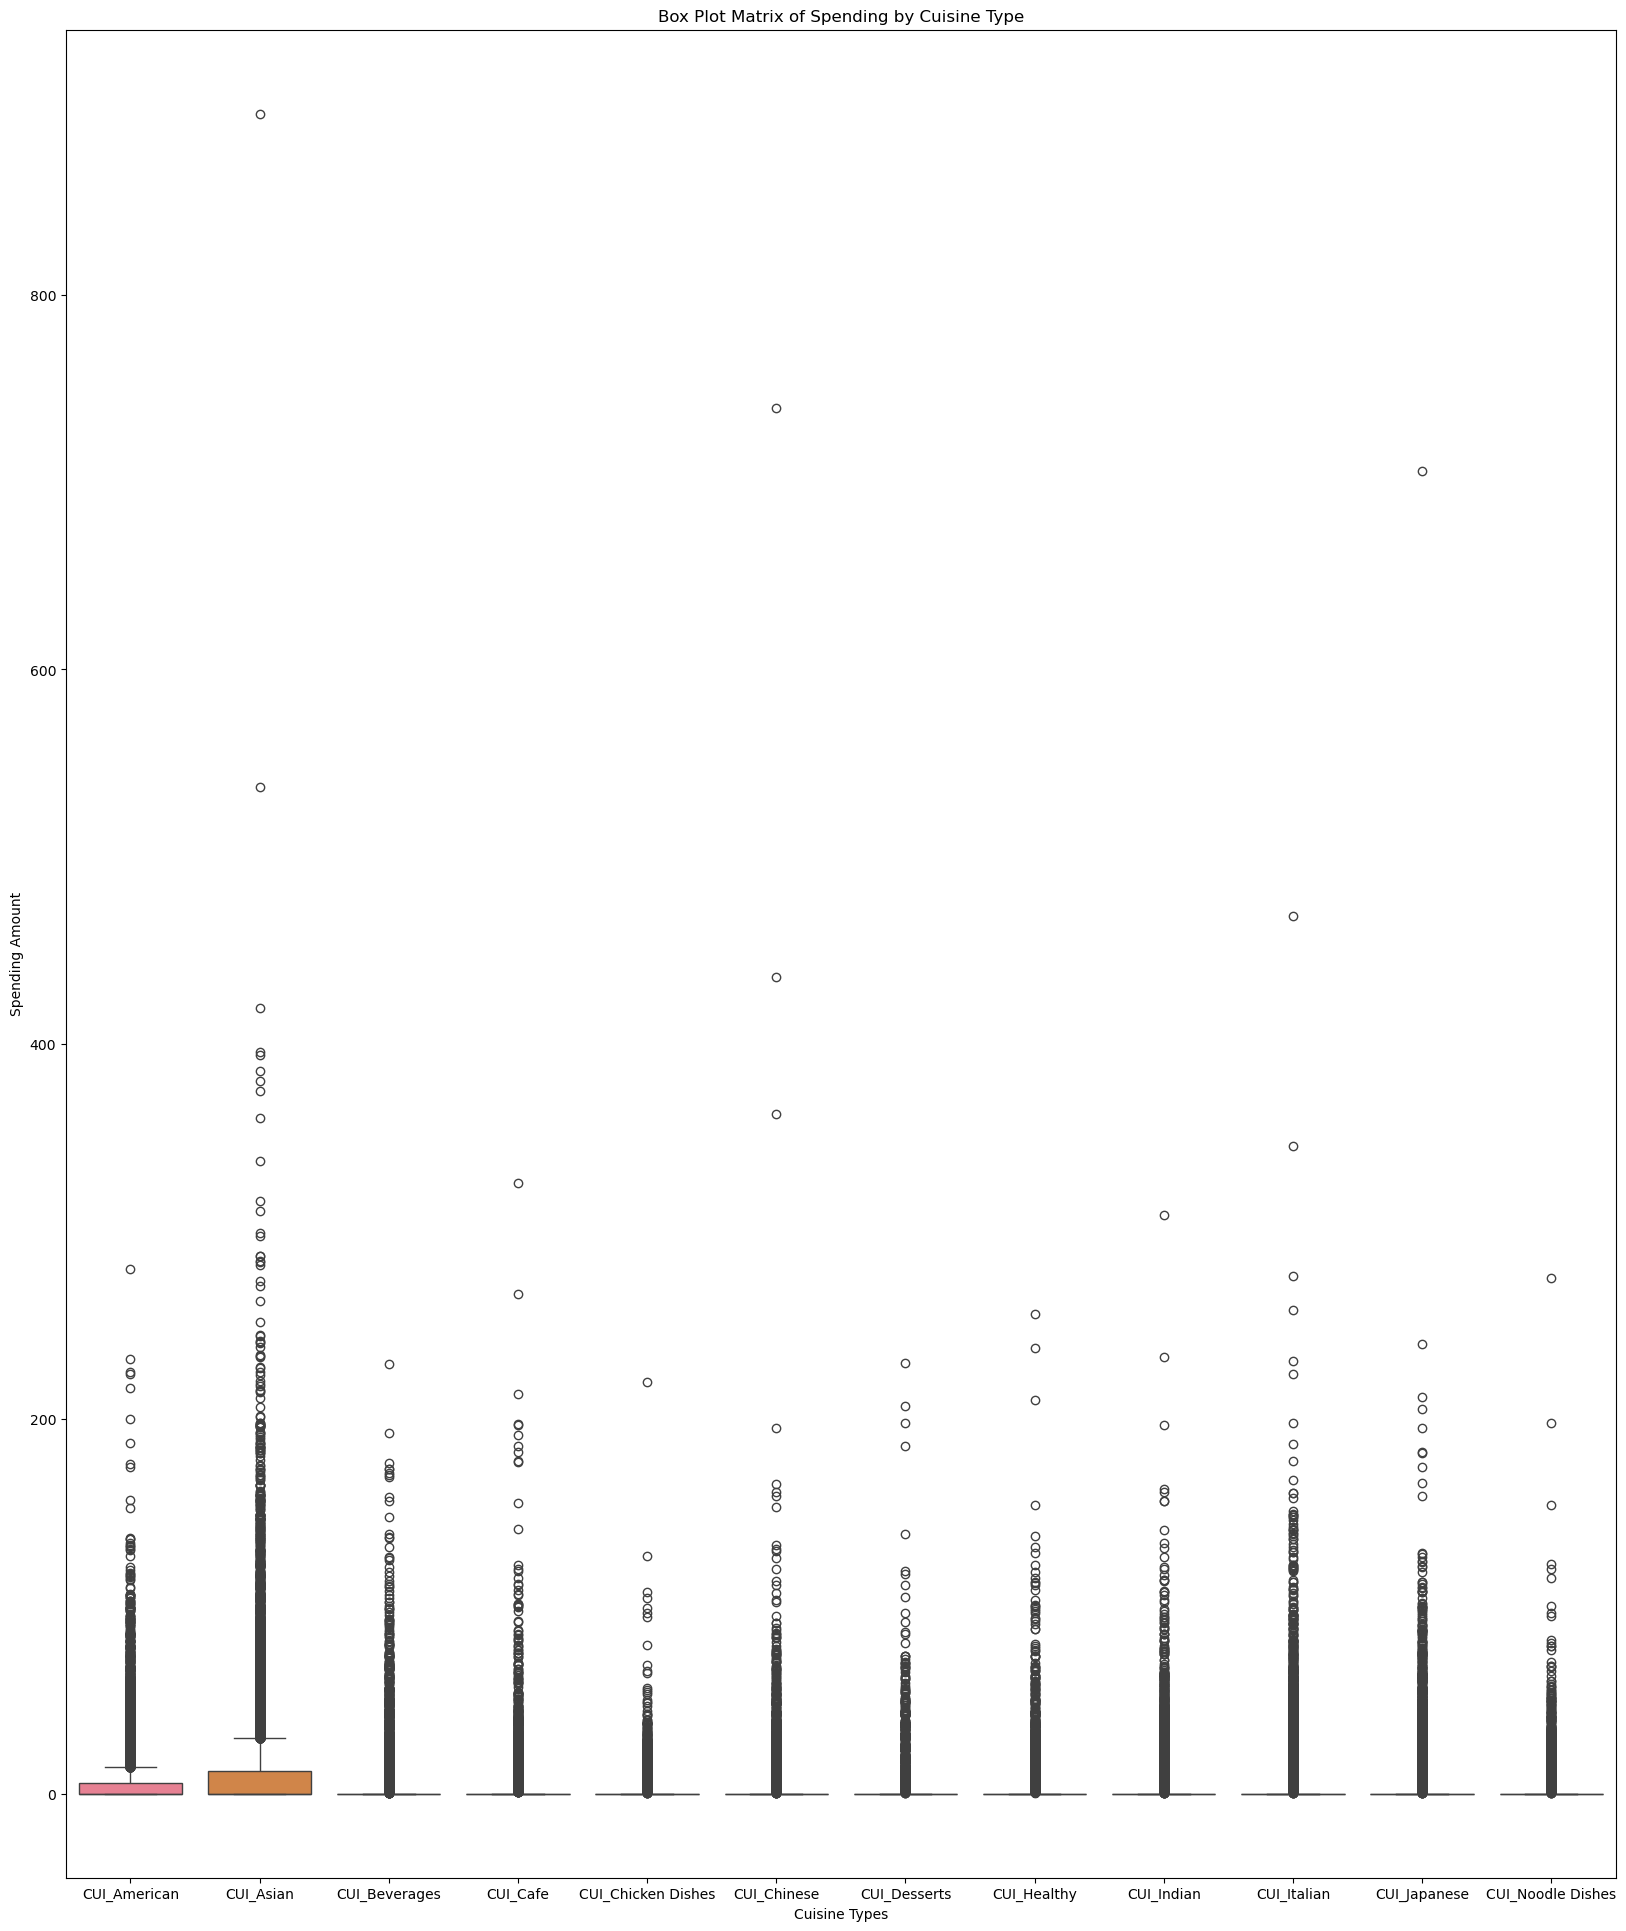

In [47]:
# Setting plot size for a matrix
plt.figure(figsize=(20, 24))

# Corrected list of columns with proper comma separation
sns.boxplot(data=data[["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe", "CUI_Chicken Dishes", 
                       "CUI_Chinese", "CUI_Desserts", "CUI_Healthy", "CUI_Indian", "CUI_Italian", 
                       "CUI_Japanese", "CUI_Noodle Dishes"]])

# Add title and labels
plt.title('Box Plot Matrix of Spending by Cuisine Type')
plt.xlabel('Cuisine Types')
plt.ylabel('Spending Amount')

# Show the plot
plt.show()


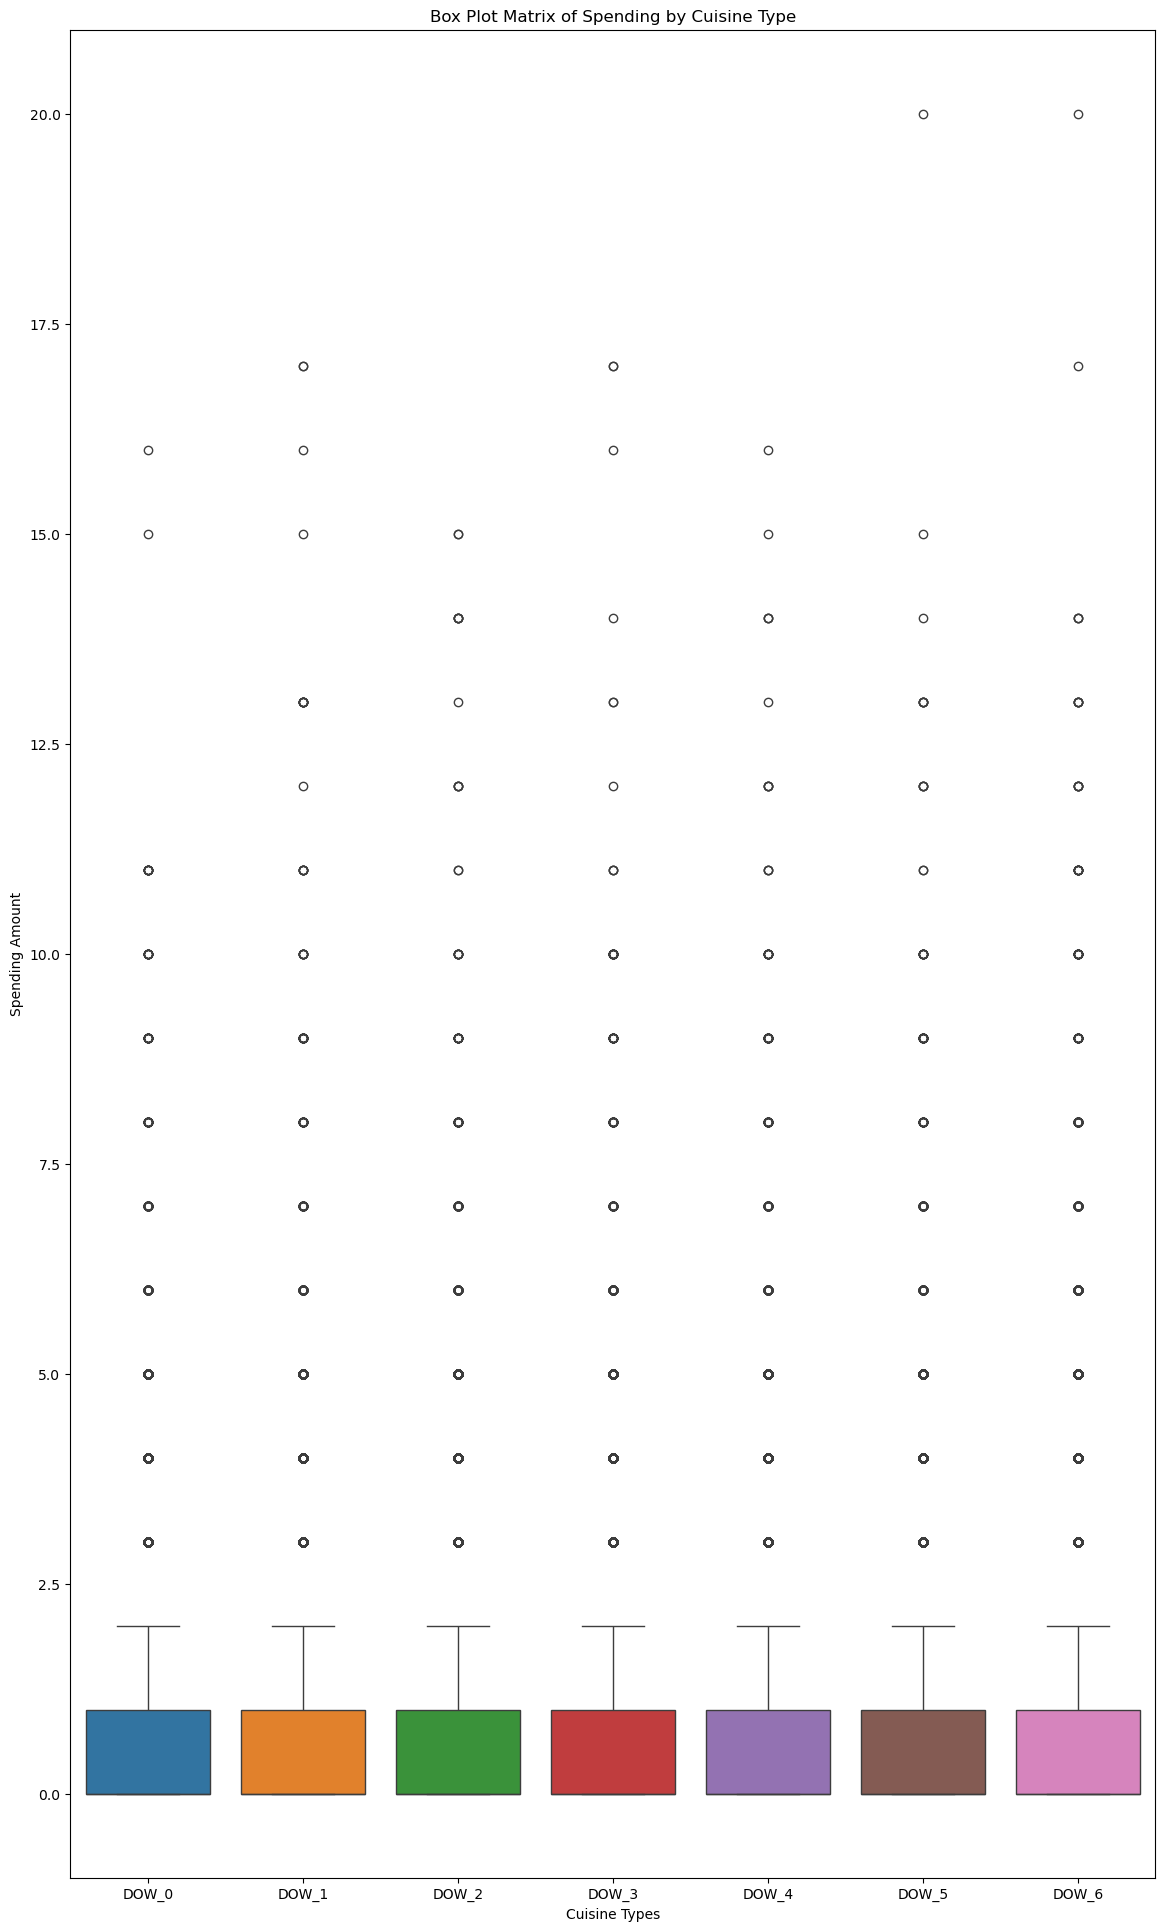

In [48]:
# Setting plot size for a matrix
plt.figure(figsize=(14, 24))

# Corrected list of columns with proper comma separation
sns.boxplot(data=data[["DOW_0", "DOW_1", "DOW_2", "DOW_3", "DOW_4", 
                       "DOW_5", "DOW_6"]])

# Add title and labels
plt.title('Box Plot Matrix of Spending by Cuisine Type')
plt.xlabel('Cuisine Types')
plt.ylabel('Spending Amount')

# Show the plot
plt.show()

In [57]:
def plot_multiple_boxes_with_outliers1(data, columns, ncols=2):
    """
    Plots box plots for specified columns in the DataFrame and highlights the outliers.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    columns (list): A list of column names to plot.
    ncols (int): Number of columns in the subplot grid.
    """
    num_columns = len(columns)
    nrows = (num_columns + ncols - 1) // ncols  # Calculate the number of rows needed

    plt.figure(figsize=(8 * ncols, 4 * nrows))

    for i, column in enumerate(columns):
        # Calculate quartiles and IQR
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine the outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

        # Create the box plot for the current column
        plt.subplot(nrows, ncols, i + 1)  # Create a subplot grid
        plt.boxplot(data[column], vert=False, widths=0.7,
                    patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'),
                    medianprops=dict(color='black'))

        # Scatter outliers
        plt.scatter(outliers, [1] * len(outliers), color='red', marker='o', label='Outliers')

        # Customize the plot
        plt.title(f'Box Plot of {column} with Outliers')
        plt.xlabel('Value')
        plt.yticks([])
        plt.legend()

    plt.tight_layout()  # Adjust subplots to fit into the figure area.
    plt.show()

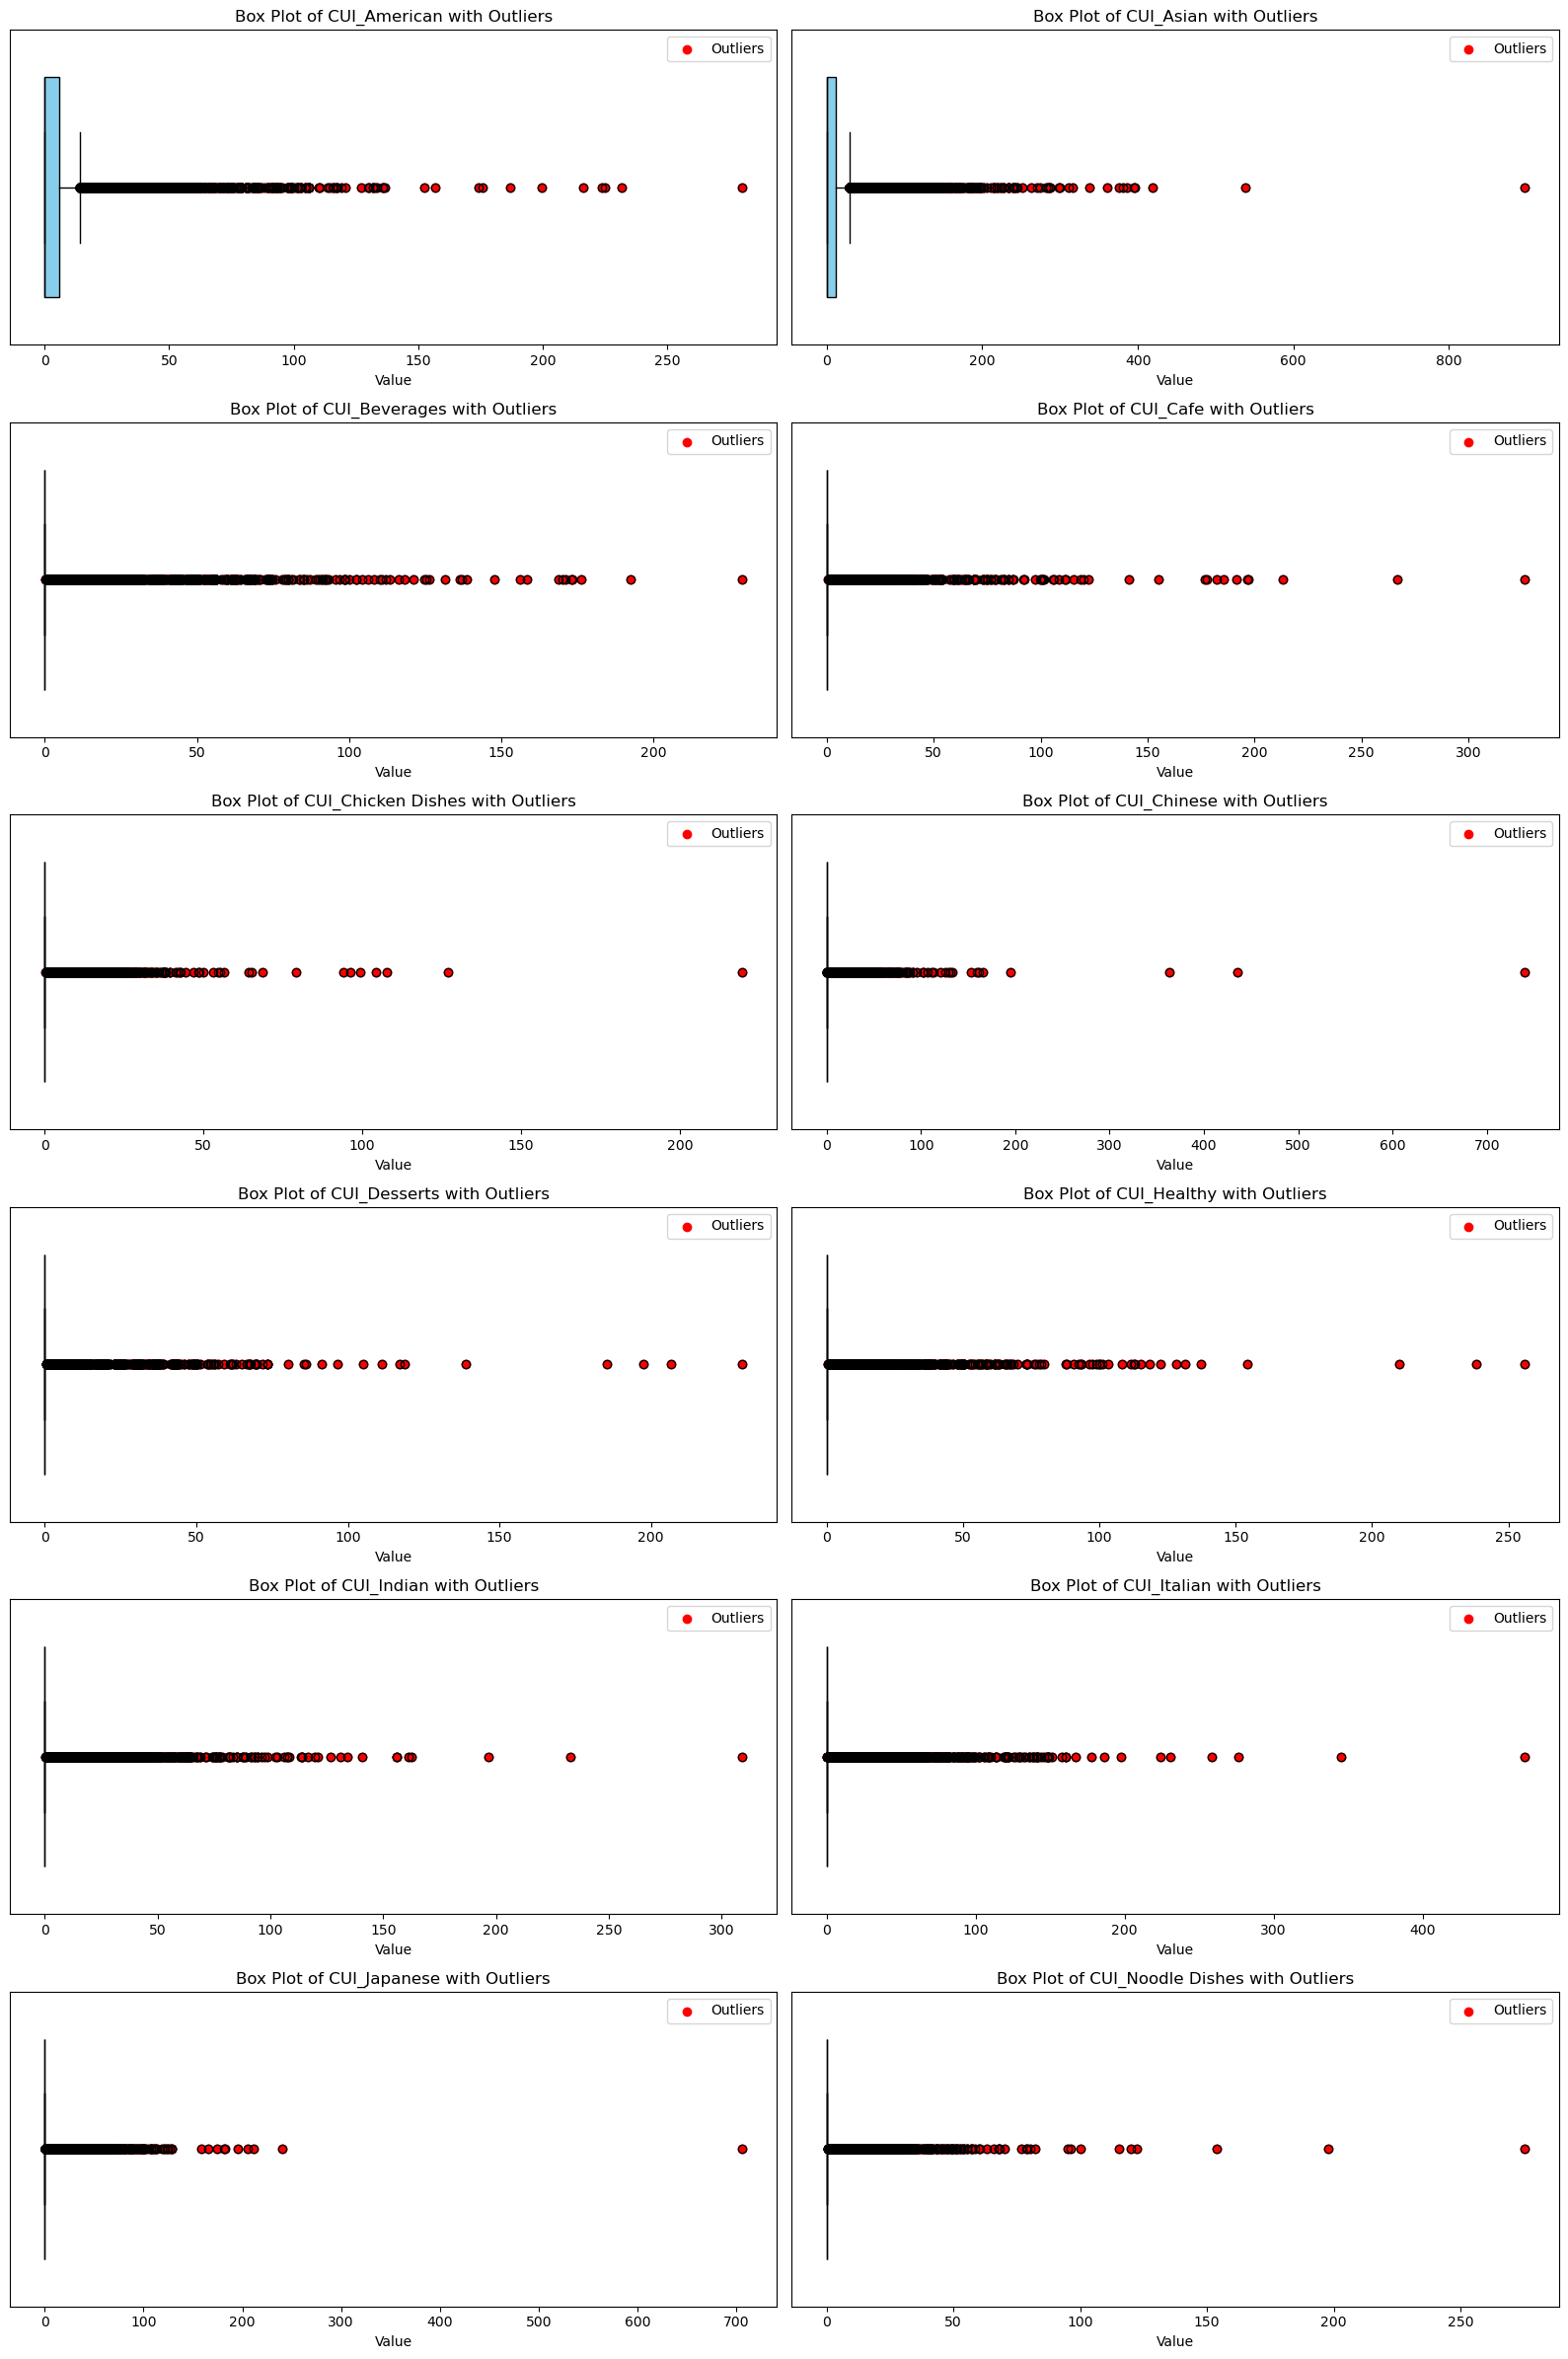

In [58]:
plot_multiple_boxes_with_outliers1(data, ["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe", "CUI_Chicken Dishes", 
                       "CUI_Chinese", "CUI_Desserts", "CUI_Healthy", "CUI_Indian", "CUI_Italian", 
                       "CUI_Japanese", "CUI_Noodle Dishes"])

## 2.5 Feature Engineering

<a href="#top">Top &#129033;</a>


In this step Feature Engineering will be performed. This consists of transforming existing variables, such as ``last_promo`` and ``payment_method``, and creating new variables from the existing ones, that we believe would add important information which will be useful in the Customer Segmentation part of the project.

Before doing so, we will have a look at how the dataset looks before these transformations.

In [16]:
# for column in data.columns:
    
#     if data[column].nunique() < 100:
        
#         print(f"Unique values in '{column}': {data[column].unique()}\n")

# TEMP
data = data.dropna()

In [19]:
data.head(3)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,promo_DELIVERY,promo_DISCOUNT,promo_FREEBIE,pay_CARD,pay_CASH,days_between,total_orders,avg_order_hour,total_spend,avg_spend_prod,is_repeat_customer
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,1.0,2,18.0,28.88,5.776,1
5d272b9dcb,8670,17.0,2,2,2,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,2,10.5,19.21,9.605,1
f6d1b2ba63,4660,38.0,1,2,2,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1.0,2,10.0,9.20,4.600,1


**Variable Transformation**

We noticed that ``first_order`` is saved as a float, whereas ``last_order`` is saved as an integer. Consequently, ``first_order`` will be saved as an integer, as we believe it makes more sense to do so. 

In [18]:
data['first_order'] = data['first_order'].astype(int)

The same thing will be done for HR_0, which should also be an integer

In [20]:
data['HR_0'] = data['HR_0'].astype(int)

**Dummy Columns**

In this subsection, we transformed the ``last_prom`` column, which contains categorical values representing different promotion types (DELIVERY, DISCOUNT, FREEBIE, and - ), into dummy variables. 

The same process was done for ``payment_method``, that represents payment types (CARD, CASH and DIGI).


This process, known as one-hot encoding, allows us to represent the categorical data in a binary format, suitable for Customer Segmentation processes.

Creating the dummy columns for ``last_prom``

In [5]:
promo_dummies = pd.get_dummies(data['last_promo'], 
                               prefix='promo', dummy_na=False)



Since the output consists of Boolean values, these are transformed into Binary representations (1/0)

In [6]:
promo_dummies = promo_dummies.astype(int)

Creating the dummy columns for ``payment_method``

In [7]:
payment_dummies = pd.get_dummies(data['payment_method'], 
                               prefix='pay', dummy_na=False)



Since the output consists of Boolean values, these are transformed into Binary representations (1/0)

In [8]:
payment_dummies = payment_dummies.astype(int)

Joining all the dummy columns to the dataset

In [9]:
data = pd.concat([data, promo_dummies, payment_dummies], axis=1)

However, having a column for each promotion type can be redundant. Since a customer can only have one promotion at a time, if promo_DELIVERY, promo_DISCOUNT and promo_FREEBIE are all 0, the only other option is *promo_-*. Therefore, the promo_- column can be dropped to avoid redundancy.

A similar approach was taken for the payment method, where the column *pay_DIGI* was dropped for the same reason, as its absence can be inferred from the other payment method columns.

This will also help to reduce the dimensionality of our dataset, which already has a high number of columns.

In [10]:
data = data.drop(['promo_-', 'pay_DIGI'], axis = 1)

**Variable Creation**

Here new features will be created based on the information that already exists in the dataset.

A brief description of all created variables follows:

*days_between* - number of days between the first and last transaction; <br>
*total_orders* - total number of orders placed;<br>
*avg_order_hour* - average hour at which each customers places an order; <br>
*total_spend* - total amount spent by each customer; <br>
*avg_spend_prod* - average amount of money spent per product; <br>
*is_repeat_customer* - verifies if the customer ordered more than once (1) or not (0).

*Days between the first and last transaction*

In [11]:
data['days_between'] = data['last_order'] - data['first_order']

*Total orders*

In [12]:
data['total_orders'] = data['DOW_0'] + data['DOW_1'] + data['DOW_2'] + data['DOW_3'] + data['DOW_4'] + data['DOW_5'] + data['DOW_6']

*Average hour for order placed*

In [13]:
hourly_orders = data.filter(like='HR_')


data['avg_order_hour'] = hourly_orders.apply(f.avg_hour, axis=1)


*Total Spend*

In [14]:
columns_to_sum = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
    'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 
    'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 
    'CUI_Street Food / Snacks', 'CUI_Thai'
]


data['total_spend'] = data[columns_to_sum].sum(axis=1)


*Average Spend per Product*

In [15]:
data['avg_spend_prod'] = np.where(data['product_count'] > 0, 
                                   data['total_spend'] / data['product_count'], 
                                   0) 

*Customers that made more than 1 order*

In [16]:
data['is_repeat_customer'] = (data['days_between'] > 0).astype(int)

After all these transformaitons we must take a look at how the dataset looks before moving to the next section

In [17]:
data.head(3)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,promo_DELIVERY,promo_DISCOUNT,promo_FREEBIE,pay_CARD,pay_CASH,days_between,total_orders,avg_order_hour,total_spend,avg_spend_prod,is_repeat_customer
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,1.0,2,18.0,28.88,5.776,1
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,2,10.5,19.21,9.605,1
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1.0,2,10.0,9.20,4.600,1


## 2.6 Visualisations

<a href="#top">Top &#129033;</a>

fazer bubble scatterplot para o total spend e 

## 3. Export

<a href="#top">Top &#129033;</a>

As a final step in this notebook, we must export the treated dataset to be used in the next phase of the project.

In [ ]:
# data.to_csv('./new_data')